In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.io_utils import load_data,  coerce_numeric


df = coerce_numeric(load_data('data/library_loans.csv'))
df = df.dropna(subset=['loan_days']).copy()
df = df[df['loan_days'] > 0].copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 127
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   loan_id           124 non-null    object        
 1   checkout_date     124 non-null    datetime64[ns]
 2   branch            121 non-null    object        
 3   genre             118 non-null    object        
 4   item_type         123 non-null    object        
 5   patron_age_group  123 non-null    object        
 6   loan_days         124 non-null    int64         
 7   returned_date     108 non-null    datetime64[ns]
 8   overdue_days      114 non-null    float64       
 9   fine_amount       113 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 10.7+ KB


,loan_id,checkout_date,branch,genre,item_type,patron_age_group,loan_days,returned_date,overdue_days,fine_amount
0,L0005,2025-08-05,Väster,Romantik,E-bok,Vuxen,18,2025-08-23,0.0,NaN
1,L0041,2025-08-30,Öster,Biografi,Tidskrift,Vuxen,23,2025-09-22,1.0,2.935475
2,L0091,2025-03-19,Väster,Biografi,E-bok,Vuxen,23,2025-04-11,2.0,13.479296
3,L0083,2025-06-12,Öster,Fakta,Tidskrift,Vuxen,21,2025-07-03,0.0,0.000000
4,L0043,2025-08-09,Söder,Biografi,Ljudbok,Vuxen,23,2025-09-01,1.0,6.428793


In [2]:
# added new columns month and week

df['month'] = df['checkout_date'].dt.to_period('M').dt.to_timestamp().dt.date
df['week'] = df['checkout_date'].dt.to_period('W').dt.start_time.dt.date


df.head()




,loan_id,checkout_date,branch,genre,item_type,patron_age_group,loan_days,returned_date,overdue_days,fine_amount,month,week
0,L0005,2025-08-05,Väster,Romantik,E-bok,Vuxen,18,2025-08-23,0.0,NaN,2025-08-01,2025-08-04
1,L0041,2025-08-30,Öster,Biografi,Tidskrift,Vuxen,23,2025-09-22,1.0,2.935475,2025-08-01,2025-08-25
2,L0091,2025-03-19,Väster,Biografi,E-bok,Vuxen,23,2025-04-11,2.0,13.479296,2025-03-01,2025-03-17
3,L0083,2025-06-12,Öster,Fakta,Tidskrift,Vuxen,21,2025-07-03,0.0,0.000000,2025-06-01,2025-06-09
4,L0043,2025-08-09,Söder,Biografi,Ljudbok,Vuxen,23,2025-09-01,1.0,6.428793,2025-08-01,2025-08-04


In [3]:
df

,loan_id,checkout_date,branch,genre,item_type,patron_age_group,loan_days,returned_date,overdue_days,fine_amount,month,week
0,L0005,2025-08-05,Väster,Romantik,E-bok,Vuxen,18,2025-08-23,0.0,NaN,2025-08-01,2025-08-04
1,L0041,2025-08-30,Öster,Biografi,Tidskrift,Vuxen,23,2025-09-22,1.0,2.935475,2025-08-01,2025-08-25
2,L0091,2025-03-19,Väster,Biografi,E-bok,Vuxen,23,2025-04-11,2.0,13.479296,2025-03-01,2025-03-17
3,L0083,2025-06-12,Öster,Fakta,Tidskrift,Vuxen,21,2025-07-03,0.0,0.000000,2025-06-01,2025-06-09
4,L0043,2025-08-09,Söder,Biografi,Ljudbok,Vuxen,23,2025-09-01,1.0,6.428793,2025-08-01,2025-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...
123,L0099,2025-09-14,Väster,Fakta,Bok,Barn,29,2025-10-13,8.0,36.789458,2025-09-01,2025-09-08
124,L0093,2025-04-20,Öster,Romantik,Bok,Vuxen,1,2025-04-21,0.0,0.000000,2025-04-01,2025-04-14
125,L0067,2025-01-21,Väster,Fakta,Bok,Vuxen,29,2025-02-19,8.0,36.238403,2025-01-01,2025-01-20
126,L0110,2025-07-29,Centrum,Romantik,Bok,Vuxen,25,2025-08-23,4.0,24.017511,2025-07-01,2025-07-28


In [4]:
from src import metrics as M

print(f'Total antal lån: {M.total_loans(df)}')
print(f'Genomsnitlig lånetid (dagar): {M.avg_loan_days(df):.1f}')
print(f'Antal övertid (%): {100 * M.overdue_rate(df):.1f}%')

Total antal lån: 116
Genomsnitlig lånetid (dagar): 21.3
Antal övertid (%): 47.6%


In [5]:
by_genre = M.loans_by_genre(df)
by_genre

,genre,loans
0,Biografi,22
1,Fakta,22
2,Deckare,20
3,Sci-Fi,17
4,Romantik,17
5,Barn,16
6,NaN,6


In [6]:
by_branch = M.loans_by_branch(df)
by_branch

,branch,loans
0,Öster,32
1,Väster,28
2,Norr,21
3,Centrum,20
4,Söder,13
5,NaN,3


In [7]:
ts_month = M.loans_over_time(df, freq='M')
ts_month.head()

c:\Users\benji\Desktop\lektioner\V_5_1\src\metrics.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(freq)['loan_id'].nunique()


,checkout_date,loans
0,2025-01-31,16
1,2025-02-28,15
2,2025-03-31,9
3,2025-04-30,9
4,2025-05-31,13


KeyError: 'month'

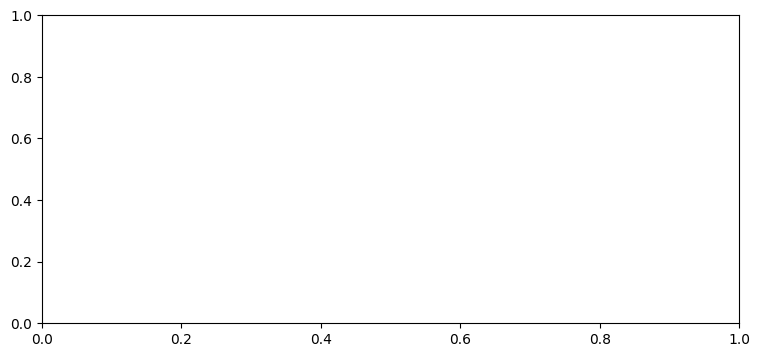

In [8]:
import matplotlib.pyplot as plt
from src import viz as V

# # lån per genre
# fig, ax = plt.subplots(figsize = (9, 4))
# V.bar(ax,by_genre['genre'], by_genre['loans'], 'Lån per genre', 'Genre', 'Antal lån')


# # top -10 filialer
# fig, ax = plt.subplots(figsize = (9, 4))
# top_10 = by_branch.head(10)
# V.bar(ax, top_10['branch'], top_10['loans'], 'Topp 10 filialer efter antal lån', 'Filial', 'Antal lån')

# lån per månad
fig, ax = plt.subplots(figsize = (9, 4))
V.line(ax, ts_month['month'], ts_month['loans'], 'Lån per månad', 'Månad', 'Antal lån')
